In [1]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')




in this part, I will study the classification ability of factors 

# quarterly factor

In [2]:
feature_1 = pd.read_csv("feature_1.csv")
feature_2 = pd.read_csv("feature_2.csv")
feature_3 = pd.read_csv("feature_3.csv")
feature_4 = pd.read_csv("feature_4.csv")
feature_5 = pd.read_csv("feature_5.csv")
feature_6 = pd.read_csv("feature_6.csv")
feature_7 = pd.read_csv("feature_7.csv")

In [3]:
def classificaiton_rtn_daily(dataframe):
    dataframe = dataframe.fillna(0)
    quarter_list = sorted(list(set(dataframe.quarter)))
    df_init = []
    for i in range(len(quarter_list)):
        q1 = dataframe[dataframe.quarter == quarter_list[i]]
        factor_df_layers = pd.qcut(q1[dataframe.columns[3]], 10, labels=False, duplicates='drop')
        q1["layer"] = factor_df_layers
        rtn_temp = pd.DataFrame(q1.groupby("layer")["log_ret_66"].mean())
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init

def cal_rtn(series):
    num = len(series)
    list_temp = []
    ret_temp = 1
    for i in range(num):
        ret_temp *= (1+series[i])
        list_temp.append(ret_temp)
    return list_temp

def Rank_qcut(vector, K):
    quantile = np.array([float(i) / K for i in range(K + 1)]) # Quantile: K+1 values
    funBounder = lambda x: (quantile >= x).argmax()
    return vector.rank(pct=True).apply(funBounder)

feature_1 = feature_1[feature_1.year <= 2015]
feature_2 = feature_2[feature_2.year <= 2015]
feature_3 = feature_3[feature_3.year <= 2015]
feature_4 = feature_4[feature_4.year <= 2015]
feature_5 = feature_5[feature_5.year <= 2015]
feature_6 = feature_6[feature_6.year <= 2015]
feature_7 = feature_7[feature_7.year <= 2015]

df_1 = classificaiton_rtn_daily(feature_1)
df_2 = classificaiton_rtn_daily(feature_2)
df_3 = classificaiton_rtn_daily(feature_3)
df_4 = classificaiton_rtn_daily(feature_4)
df_5 = classificaiton_rtn_daily(feature_5)
df_6 = classificaiton_rtn_daily(feature_6)
df_7 = classificaiton_rtn_daily(feature_7)


feature1

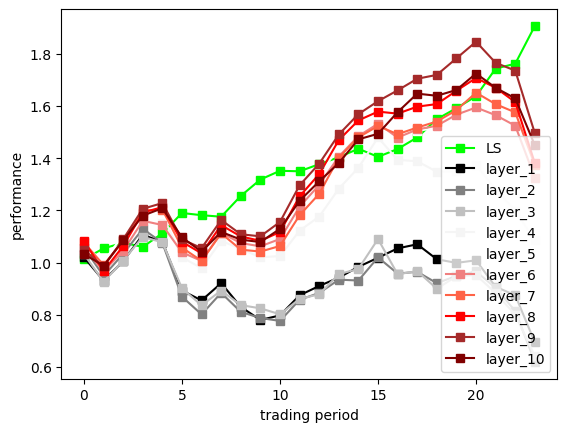

In [4]:
df = df_1
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

feature_2

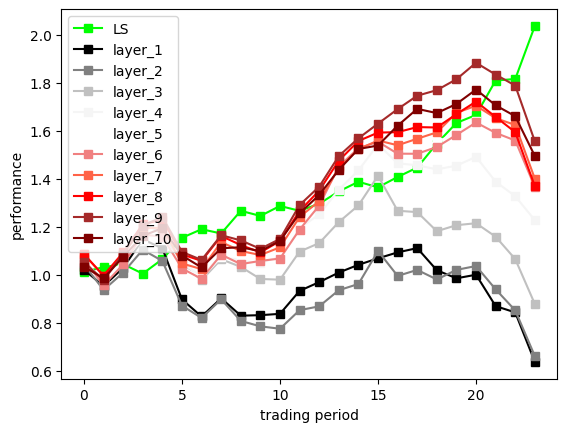

In [5]:
df = df_2
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

feature_3

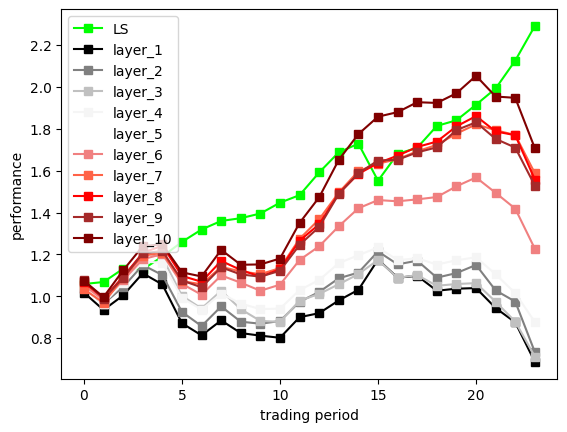

In [6]:
df = df_3
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

In [7]:
k11 = pd.Series(k11)
print('max drawdown：', np.min(k11 / np.maximum.accumulate(k11) - 1))
print('annual return', (k11.iloc[-1]/k11.iloc[0])**(4/len(k11.index))-1)
print('Sharpe ratio',((k11.iloc[-1]/k11.iloc[0])**(4/len(k11.index))-1)/(k11.pct_change().std()* np.sqrt(4)))

max drawdown： -0.1022749600153674
annual return 0.13739285761468745
Sharpe ratio 1.7860932162489938


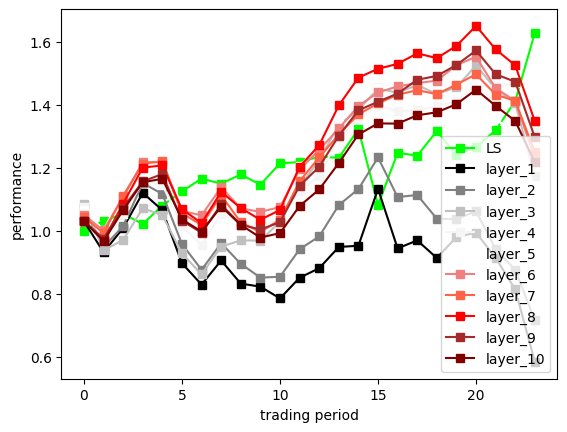

In [8]:
df = df_4
df_T = df.T
df_T = df_T.dropna()
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

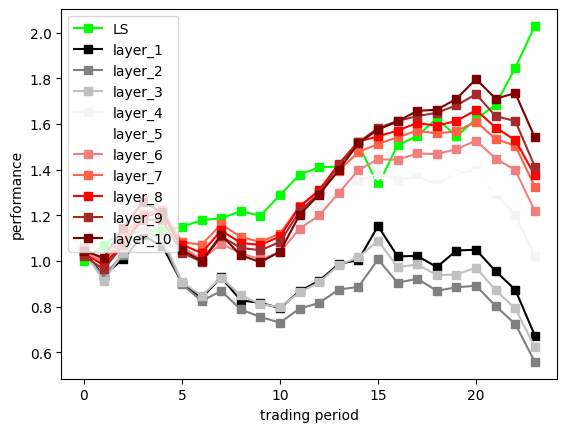

In [9]:
df = df_5
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

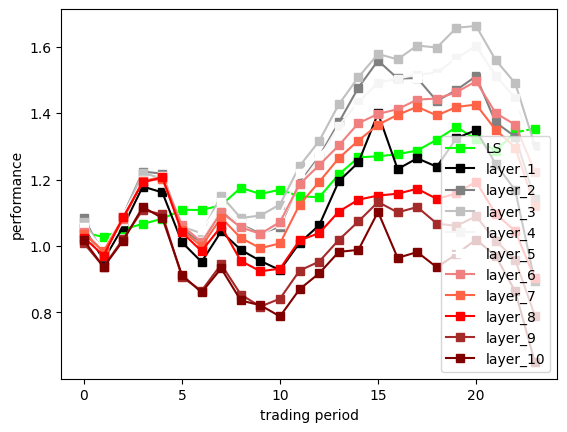

In [10]:
df = df_6
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[0.0])-np.exp(df_T[9.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

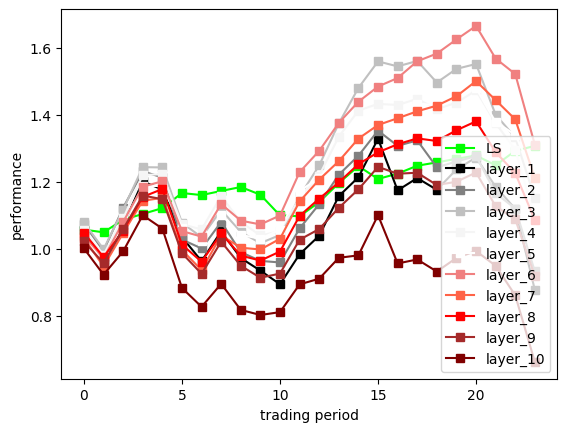

In [11]:
df = df_7
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[0.0])-np.exp(df_T[9.0])
#折线图
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,'s-',color = 'lime',label="LS")


plt.plot(x,k1,'s-',color = 'black',label="layer_1")
plt.plot(x,k2,'s-',color = 'gray',label="layer_2")
plt.plot(x,k3,'s-',color = 'silver',label="layer_3")
plt.plot(x,k4,'s-',color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,'s-',color = 'white',label="layer_5")
plt.plot(x,k6,'s-',color = 'lightcoral',label="layer_6")
plt.plot(x,k7,'s-',color = 'tomato',label="layer_7")
plt.plot(x,k8,'s-',color = 'red',label="layer_8")
plt.plot(x,k9,'s-',color = 'brown',label="layer_9")
plt.plot(x,k10,'s-',color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

conclusion: we will focus on feature 1,2,3,4,5,especially 3,5

# daily factor

In [22]:
feature_8 = pd.read_csv("feature_8.csv")
feature_9 = pd.read_csv("feature_9.csv")
feature_10 = pd.read_csv("feature_10.csv")
feature_11 = pd.read_csv("feature_11.csv")


In [23]:
def Rank_qcut(vector, K):
    quantile = np.array([float(i) / K for i in range(K + 1)]) # Quantile: K+1 values
    funBounder = lambda x: (quantile >= x).argmax()
    return vector.rank(pct=True).apply(funBounder)
def cal_rtn(series):
    num = len(series)
    list_temp = []
    ret_temp = 1
    for i in range(num):
        ret_temp *= (1+series[i])
        list_temp.append(ret_temp)
    return list_temp
def classificaiton_rtn(dataframe):
    date_list = sorted(list(set(dataframe.data_date)))
    df_init = []
    for i in range(len(date_list)):
        q1 = dataframe[dataframe.data_date == date_list[i]]
        factor_df_layers = pd.qcut(q1[dataframe.columns[3]], 10, labels=False,duplicates = "drop")
        q1["layer"] = factor_df_layers
        rtn_temp = pd.DataFrame(q1.groupby("layer")["log_ret_1"].mean())
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init
        

feature_8 = feature_8[feature_8.data_date <= 20151231]
feature_9 = feature_9[feature_9.data_date <= 20151231]
feature_10 = feature_10[feature_10.data_date <= 20151231]
feature_11 = feature_11[feature_11.data_date <= 20151231]

df_8 = classificaiton_rtn(feature_8)
df_9 = classificaiton_rtn(feature_9)
df_10 = classificaiton_rtn(feature_10)
df_11= classificaiton_rtn(feature_11)

feature_8

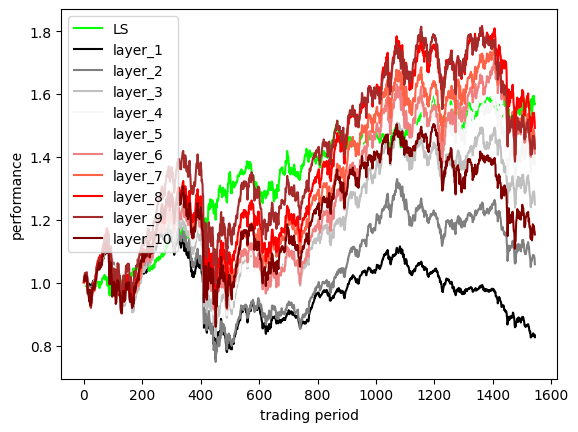

In [25]:
df = df_8
#折线图
df_T = df.T
df_T = df_T.dropna()
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
df_T.index = range(len(df_T))
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

feature_9

In [26]:
def classificaiton_rtn_9(dataframe):
    date_list = sorted(list(set(dataframe.data_date)))
    df_init = []
    for i in range(len(date_list)):
        q1 = dataframe[dataframe.data_date == date_list[i]]
        factor_df_layers = Rank_qcut(q1["d9"], 10)
        q1["layer"] = factor_df_layers
        rtn_temp = pd.DataFrame(q1.groupby("layer")["log_ret_1"].mean())
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init

df_9 = classificaiton_rtn_9(feature_9)    

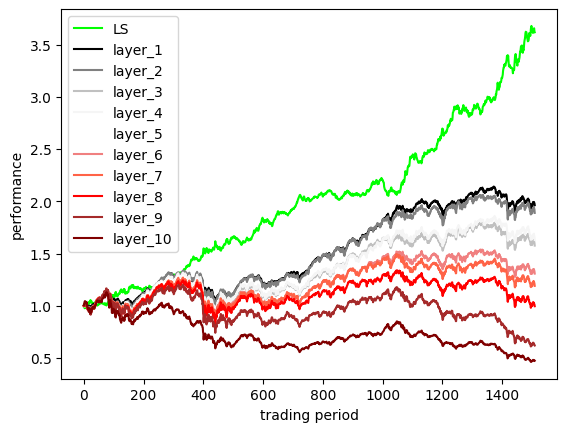

In [27]:
df = df_9
#折线图
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[1])-np.exp(df_T[10])
df_T.index = range(len(df_T))
x = df_T.index
k1 = cal_rtn(df_T[1])
k2 = cal_rtn(df_T[2])
k3 = cal_rtn(df_T[3])
k4 = cal_rtn(df_T[4])
k5 = cal_rtn(df_T[5])
k6 = cal_rtn(df_T[6])
k7 = cal_rtn(df_T[7])
k8 = cal_rtn(df_T[8])
k9 = cal_rtn(df_T[9])
k10 = cal_rtn(df_T[10])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

In [28]:
k11 = pd.Series(k11)
print('max drawdown：', np.min(k11 / np.maximum.accumulate(k11) - 1))
print('annual return', (k11.iloc[-1]/k11.iloc[0])**(252/len(k11.index))-1)
print('Sharpe ratio',((k11.iloc[-1]/k11.iloc[0])**(252/len(k11.index))-1)/(k11.pct_change().std()* np.sqrt(252)))

max drawdown： -0.07738621722016226
annual return 0.2404597423462005
Sharpe ratio 2.680169398828852


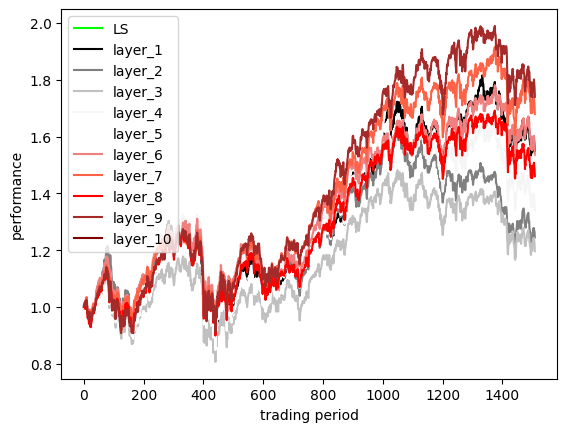

In [29]:
df = df_10
#折线图
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
df_T.index = range(len(df_T))
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

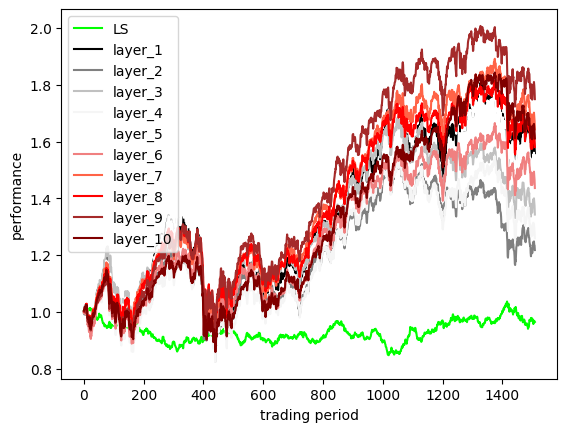

In [30]:
df = df_11
#折线图
df_T = df.T
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
df_T.index = range(len(df_T))
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

conclusion: we will focus on feature_8 and feature_9,especially feature_9